In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [55]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [34]:
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [44]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
print(x_train.shape)
print(x_train)


(20, 1)
[[-0.72313942]
 [ 0.14620852]
 [-0.60459198]
 [-0.09088638]
 [ 1.37119879]
 [ 0.81797738]
 [-1.35539247]
 [ 2.28006255]
 [-0.68362361]
 [-0.99975013]
 [ 0.46233504]
 [ 0.50185086]
 [-0.4070129 ]
 [-0.60459198]
 [ 1.68732532]
 [-1.07878176]
 [-1.4344241 ]
 [ 0.93652482]
 [ 0.06717689]
 [-0.28846545]]


In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# X_test = sc_X.transform(X_test)

In [46]:
x_train = sc_X.fit_transform(x_train)
x_train

array([[-0.72313942],
       [ 0.14620852],
       [-0.60459198],
       [-0.09088638],
       [ 1.37119879],
       [ 0.81797738],
       [-1.35539247],
       [ 2.28006255],
       [-0.68362361],
       [-0.99975013],
       [ 0.46233504],
       [ 0.50185086],
       [-0.4070129 ],
       [-0.60459198],
       [ 1.68732532],
       [-1.07878176],
       [-1.4344241 ],
       [ 0.93652482],
       [ 0.06717689],
       [-0.28846545]])

In [47]:
x_test = sc_X.transform(x_test)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

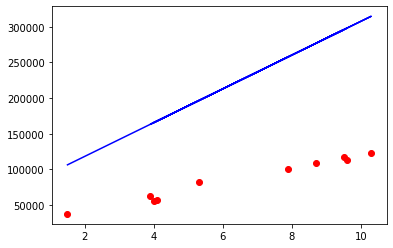

In [52]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')

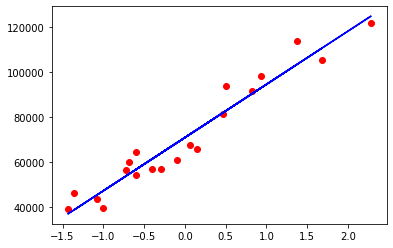

In [51]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

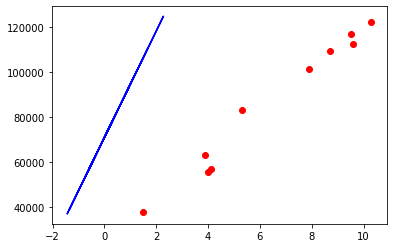

In [53]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

# logistic regr


In [57]:
data = pd.read_csv("insurance_data.csv")
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


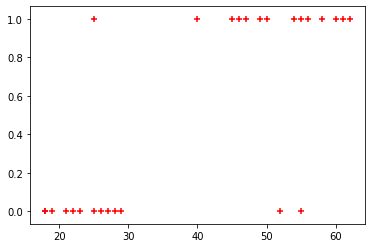

In [59]:
plt.scatter(data.age, data.bought_insurance,marker='+',color="red")
x_train, x_test, y_train, y_test = train_test_split(data[['age']], data.bought_insurance, test_size = 1/3, random_state = 0)



In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [65]:
model.fit(x_train, y_train)


/home/vansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0])

In [67]:
from sklearn import metrics

In [68]:
cm = metrics.confusion_matrix(y_test, model.predict(x_test))
print(cm)

[[3 0]
 [0 6]]
